In [123]:
import numpy as np
import pandas as pd
import networkx as nx

from collections import defaultdict

import re
import nltk
from nltk.corpus import stopwords  
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Graph representation of text data**

In this code, you can write any text you want and run the cells below to convert your text to a graph. To preprocess the text data, I first changed all the words to lowercase. Then, I removed all the punctuation and stop words, and I also used stemming. To build the graph, I used each word of the preprocessed text as a node, and I used pointwise mutual information (PMI), which is a very popular method for specifying the edge weights between word nodes. However, my text document is very short. You can change it however you want and run these cells to see the result.

In this cell you can write any text that you want and see it as a graph.

In [124]:
document = "The bird flew in the sky and the sky was blue. The bird was happy and the sky was clear. The bird flew freely."

This cell is for preprocessing the text. I just used simple text preprocessing methods.

In [125]:
#preprocessing the corpus
processed_document= []

#lower the words
doc_lower = document.lower()

#removing the punctuations
nopunctuation_doc = re.sub(r'[^\w\s]', '',doc_lower)

#splitting the words
words = nopunctuation_doc.split()

#stemming
stemmed_words = [stemmer.stem(word) for word in words]

#removing the stop words
filtered_words = [word for word in stemmed_words if word not in stop_words]

#joining the words and making the document
processed_document = " ".join(filtered_words)

print(processed_document)

bird flew sky sky wa blue bird wa happi sky wa clear bird flew freeli


Here we build the co-occurrence matrix because we will need this matrix for calculating PMI

In [126]:
#building the co-occurrence matrix
cooccurrence_matrix = defaultdict(lambda: defaultdict(int))
words = processed_document.split()
for i, word in enumerate(words):
    for j in range(max(i - 2, 0), min(i + 3, len(words))):
        if i != j:
            cooccurrence_matrix[word][words[j]] += 1
print(cooccurrence_matrix)

defaultdict(<function <lambda> at 0x783deeb76b00>, {'bird': defaultdict(<class 'int'>, {'flew': 2, 'sky': 1, 'wa': 3, 'blue': 1, 'happi': 1, 'clear': 1, 'freeli': 1}), 'flew': defaultdict(<class 'int'>, {'bird': 2, 'sky': 2, 'clear': 1, 'freeli': 1}), 'sky': defaultdict(<class 'int'>, {'bird': 1, 'flew': 2, 'sky': 2, 'wa': 4, 'blue': 1, 'happi': 1, 'clear': 1}), 'wa': defaultdict(<class 'int'>, {'sky': 4, 'blue': 2, 'bird': 3, 'happi': 2, 'clear': 1}), 'blue': defaultdict(<class 'int'>, {'sky': 1, 'wa': 2, 'bird': 1}), 'happi': defaultdict(<class 'int'>, {'bird': 1, 'wa': 2, 'sky': 1}), 'clear': defaultdict(<class 'int'>, {'sky': 1, 'wa': 1, 'bird': 1, 'flew': 1}), 'freeli': defaultdict(<class 'int'>, {'bird': 1, 'flew': 1})})


In [127]:
word_counts = defaultdict(int)
total_count = 0
words = processed_document.split()
for word in words:
    word_counts[word] += 1
    total_count += 1
print(word_counts)
print(len(word_counts))

defaultdict(<class 'int'>, {'bird': 3, 'flew': 2, 'sky': 3, 'wa': 3, 'blue': 1, 'happi': 1, 'clear': 1, 'freeli': 1})
8


In [128]:
pmi_matrix = defaultdict(lambda: defaultdict(float))
for firstword in cooccurrence_matrix:
    for secondword in cooccurrence_matrix[firstword]:
        cooccurrence_count = cooccurrence_matrix[firstword][secondword]
        firstword_count = word_counts[firstword]
        secondword_count = word_counts[secondword]
        pmi = math.log2((cooccurrence_count * total_count) / (firstword_count * secondword_count))
        pmi_matrix[firstword][secondword] = pmi
print(pmi_matrix)

defaultdict(<function <lambda> at 0x783deeb77400>, {'bird': defaultdict(<class 'float'>, {'flew': 2.321928094887362, 'sky': 0.7369655941662062, 'wa': 2.321928094887362, 'blue': 2.321928094887362, 'happi': 2.321928094887362, 'clear': 2.321928094887362, 'freeli': 2.321928094887362}), 'flew': defaultdict(<class 'float'>, {'bird': 2.321928094887362, 'sky': 2.321928094887362, 'clear': 2.9068905956085187, 'freeli': 2.9068905956085187}), 'sky': defaultdict(<class 'float'>, {'bird': 0.7369655941662062, 'flew': 2.321928094887362, 'sky': 1.7369655941662063, 'wa': 2.736965594166206, 'blue': 2.321928094887362, 'happi': 2.321928094887362, 'clear': 2.321928094887362}), 'wa': defaultdict(<class 'float'>, {'sky': 2.736965594166206, 'blue': 3.321928094887362, 'bird': 2.321928094887362, 'happi': 3.321928094887362, 'clear': 2.321928094887362}), 'blue': defaultdict(<class 'float'>, {'sky': 2.321928094887362, 'wa': 3.321928094887362, 'bird': 2.321928094887362}), 'happi': defaultdict(<class 'float'>, {'bird

In [129]:
textgraph = nx.Graph()

# Add word nodes
words = processed_document.split()
for word in words:
    textgraph.add_node(word)

In [130]:
for word1 in pmi_matrix:
    for word2 in pmi_matrix[word1]:
        pmi = pmi_matrix[word1][word2]
        textgraph.add_edge(word1, word2, weight=pmi)
textgraph.remove_edges_from(nx.selfloop_edges(textgraph))

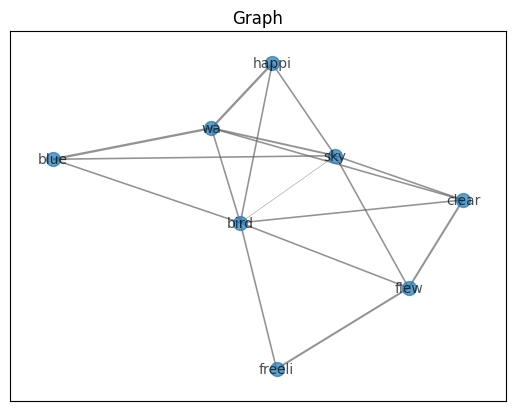

bird flew sky sky wa blue bird wa happi sky wa clear bird flew freeli


In [131]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(textgraph)

# Draw the graph
edge_width = [0.5*textgraph[u][v]['weight'] for u,v in textgraph.edges()]
nx.draw_networkx(textgraph, pos, alpha=0.7, with_labels=True, font_size=10, node_size=100, width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.title("Graph")

plt.show()
print(processed_document)

In [132]:
#number of nodes
num_nodes = textgraph.number_of_nodes()
print(num_nodes)  

8


In [133]:
#number of edges for each node
for node in textgraph.nodes:
    node_name = node
    node_degree = textgraph.degree[node]
    print(f" {node_name} = {node_degree}")

 bird = 7
 flew = 4
 sky = 6
 wa = 5
 blue = 3
 happi = 3
 clear = 4
 freeli = 2
